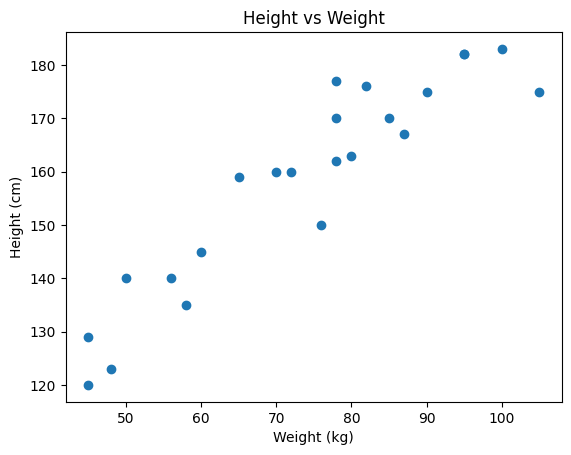

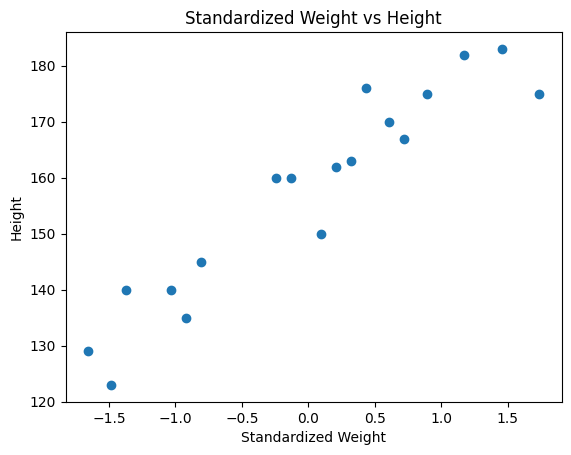

Intercept 157.5
Coffecoent [17.03440872]


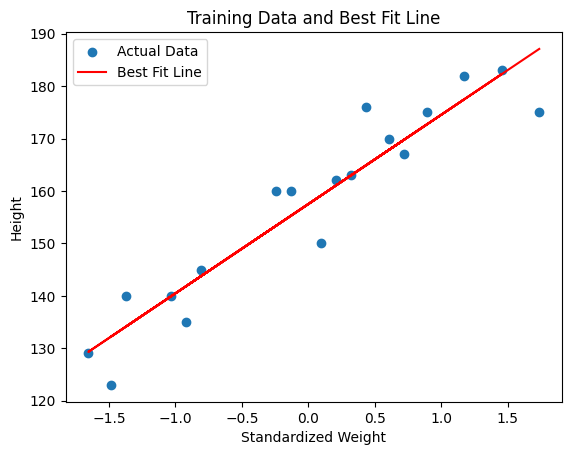

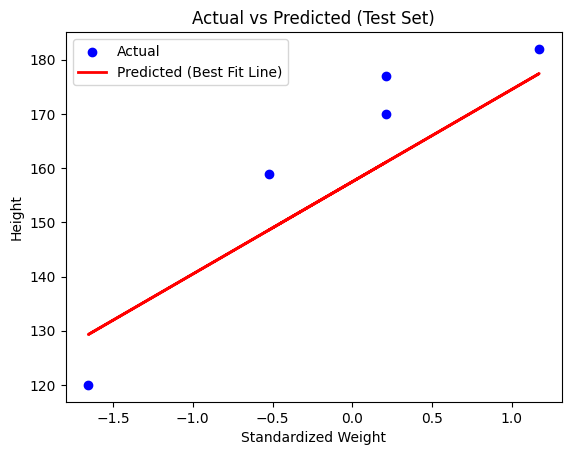

MSE: 109.77592599051664, MAE: 9.822657814519232, RMSE: 10.477400726827081, R²: 0.776986986042344
Adjusted R²: 0.7026493147231253
Height prediction for 80kg: 163.01076265919562


c:\Users\sahus\OneDrive\Desktop\Complete Data Science\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
#🔹 1. Import Required Libraries
import pandas as pd # pd is used for data manipulation
import numpy as np # np is used for numerical operations
import matplotlib.pyplot as plt # plt is used for plotting graphs
import seaborn as sns # sns is used for statistical data visualization
%matplotlib inline

from sklearn.model_selection import train_test_split # train_test_split is used to split the dataset into training and testing sets

from sklearn.linear_model import LinearRegression # LinearRegression is used to perform linear regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # These metrics are used to evaluate the performance of the regression model
# 📘 Explanation:
# •	We import all necessary tools for:
# o	Handling data (pandas, numpy)
# o	Plotting (matplotlib, seaborn)
# o	Model building (scikit-learn)

# 🔹 2. Load the Dataset
df=pd.read_csv("height-weight.csv")
df.head()


#Output:

# | Index | Weight | Height |
# | ----- | ------ | ------ |
# | 0     | 45     | 120    |
# | 1     | 58     | 135    |
# | 2     | 48     | 123    |
# | 3     | 60     | 145    |
# | 4     | 70     | 160    |
# 📘 Explanation:
# •	Reads the CSV file.
# •	.head() shows the first 5 rows to quickly inspect the data.
# 🔹 3. Visualizing the relationship between Height and Weight
plt.scatter(df['Weight'], df['Height'])
plt.title('Height vs Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.show()
# 📘 Explanation:
# •	Creates a scatter plot to see the relationship.
# •	This helps confirm if the relationship looks linear.

# 🔹 4. Prepare Input and Output Variables
X = df[['Weight']]  # Features (independent variable)
Y= df['Height']  # Target (dependent variable)
# 📘 Explanation:
# •	X (independent variable): Weight
# •	y (dependent variable): Height
# •	Double brackets ([['Weight']]) keep X as a 2D array, which is required for sklearn.

#🔹 5. Train-Test Split
# random_state is used for ensuring the same split every time the code is run.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42) 
# 📘 Explanation:
# •	Splits data into training (80%) and testing (20%) sets.
# •	random_state=42 ensures the split is reproducible.

# 🔹 6. Standardize the Features on independent_frature
from sklearn.preprocessing import StandardScaler # StandardScaler is used to standardize features by removing the mean and scaling to unit variance
# Create an instance of StandardScaler
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)        # Transform the test data using the same scaler
# 📘 Explanation:
# Height and Weight are tarin in different unit so we standardize the values to bring them to a common scale.

# Since we have training_data and test_data we need to standardize test_data based on observation 
# that we got training_data 

# In X_Train we need to calculate mean and Standard deviation but X_test we donot need to calculate 
# mean and Standard deviation so we use only transform 

# 🔹 7. Visualize Standardized Data
plt.scatter(X_train, Y_train)
plt.xlabel("Standardized Weight")
plt.ylabel("Height")
plt.title("Standardized Weight vs Height")
plt.show()

# 🔹 8. Train the Linear Regression Model
regression = LinearRegression()
regression.fit(X_train,Y_train) #Output: LinearRegression()
# 📘 Explanation:
# •	We create and train the linear regression model.
# •	It finds the best fit line (θ₀ + θ₁ * X).

# 🔹 9. View Intercept and Coefficient
print("Intercept",regression.intercept_)
print("Coffecoent",regression.coef_)
#Output:
# Intercept 157.5
# Coffecoent [17.03440872]

# 📘 Explanation:
# •	Intercept (θ₀): Y-value when X = 0.
# •	Coefficient (θ₁): Slope of the line (change in height per 1 unit change in weight).

# 🔹 10. Visualize Best Fit Line
y_predict = regression.predict(X_train) # Predicting the height using the trained model
plt.scatter(X_train, Y_train, label='Actual Data')
plt.plot(X_train, y_predict, color='red', label='Best Fit Line')
plt.xlabel("Standardized Weight")
plt.ylabel("Height")
plt.legend()
plt.title("Training Data and Best Fit Line")
plt.show()

# 📘 Explanation:
# •	Red line shows predictions.
# •	Blue dots show actual training data

# 🔹 11. Predict on Test Data
y_pred_test = regression.predict(X_test)
# 📘 Explanation:
# •	Predicts height values for the test set.

# 🔹 12. Visualize Actual vs Predicted with Best Fit Line
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_test, color='red', label='Predicted (Best Fit Line)', linewidth=2)
plt.xlabel("Standardized Weight")
plt.ylabel("Height")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()
# 📘 Explanation:
# •	Blue = real values, Red = predicted values.
# •	Shows how well the model is performing.

# 🔹 13. Model Evaluation (Metrics)
mse = mean_squared_error(Y_test, y_pred_test)
mae = mean_absolute_error(Y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred_test)
print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R²: {r2}")
#Output:    
# MSE: 109.77592599051664, MAE: 9.822657814519232, RMSE: 10.477400726827081, R²: 0.776986986042344

# 📘 Explanation:
# •	MSE: Average of squared errors.
# •	MAE: Average of absolute errors.
# •	RMSE: Root of MSE (easier to interpret).
# •	R²: How much variance is explained by the model (closer to 1 = better).

# 🔹 14. Adjusted R² Score
n = len(Y_test)  # data points
k = 1            # number of independent variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))
print(f"Adjusted R²: {adjusted_r2}") #Adjusted R²: 0.7026493147231253
# 📘 Explanation:
# •	Adjusted R² takes into account the number of predictors.
# •	It’s a better measure when comparing multiple models.

# 🔹 15. Predict for New Data (e.g. 80kg)
new_weight = [[80]]
scaled_weight = scaler.transform(new_weight)
height_prediction = regression.predict(scaled_weight)
print(f"Height prediction for 80kg: {height_prediction[0]}") #Height prediction for 80kg: 163.01076
# 📘 Explanation:
# •	Standardize the new input.
# •	Predict using the trained model.




















